In [124]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
df = pickle.load(open('dataset_level2.pkl','rb'))

In [77]:
df

# batting_team
# bowling team
# city
# current score
# ball left
# wickets left
# current rr
# last five

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Sri Lanka,Australia,0.1,0,0,Colombo,R Premadasa Stadium
1,2,Sri Lanka,Australia,0.2,1,0,Colombo,R Premadasa Stadium
2,2,Sri Lanka,Australia,0.3,4,0,Colombo,R Premadasa Stadium
3,2,Sri Lanka,Australia,0.4,1,0,Colombo,R Premadasa Stadium
4,2,Sri Lanka,Australia,0.5,1,0,Colombo,R Premadasa Stadium
...,...,...,...,...,...,...,...,...
171505,1430,Australia,Sri Lanka,19.3,2,0,NaN,Melbourne Cricket Ground
171506,1430,Australia,Sri Lanka,19.4,1,0,NaN,Melbourne Cricket Ground
171507,1430,Australia,Sri Lanka,19.5,1,TD Paine,NaN,Melbourne Cricket Ground
171508,1430,Australia,Sri Lanka,19.6,2,0,NaN,Melbourne Cricket Ground


In [78]:
df.isnull().sum()

match_id                0
batting_team            0
bowling_team            0
ball                    0
runs                    0
player_dismissed        0
city                14474
venue                   0
dtype: int64

In [79]:
df[df['city'].isnull()]['venue'].value_counts()

venue
Dubai International Cricket Stadium        3092
Sylhet Stadium                             1958
Pallekele International Cricket Stadium    1946
Melbourne Cricket Ground                   1933
Galle International Stadium                1419
Sharjah Cricket Stadium                    1230
Sydney Cricket Ground                       871
Adelaide Oval                               621
Guanggong International Cricket Stadium     483
Harare Sports Club                          372
Colombo Cricket Club Ground                 235
Sylhet International Cricket Stadium        128
Arundel Castle Cricket Club Ground          122
Carrara Oval                                 64
Name: count, dtype: int64

In [80]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [81]:
df['city'] = cities

In [82]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [51]:
df.drop(columns=['venue'],inplace=True)

In [52]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Sri Lanka,Australia,0.1,0,0,Colombo
1,2,Sri Lanka,Australia,0.2,1,0,Colombo
2,2,Sri Lanka,Australia,0.3,4,0,Colombo
3,2,Sri Lanka,Australia,0.4,1,0,Colombo
4,2,Sri Lanka,Australia,0.5,1,0,Colombo
...,...,...,...,...,...,...,...
171505,1430,Australia,Sri Lanka,19.3,2,0,Melbourne
171506,1430,Australia,Sri Lanka,19.4,1,0,Melbourne
171507,1430,Australia,Sri Lanka,19.5,1,TD Paine,Melbourne
171508,1430,Australia,Sri Lanka,19.6,2,0,Melbourne


In [83]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [84]:
df = df[df['city'].isin(eligible_cities)]

In [85]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Sri Lanka,Australia,0.1,0,0,Colombo,R Premadasa Stadium
1,2,Sri Lanka,Australia,0.2,1,0,Colombo,R Premadasa Stadium
2,2,Sri Lanka,Australia,0.3,4,0,Colombo,R Premadasa Stadium
3,2,Sri Lanka,Australia,0.4,1,0,Colombo,R Premadasa Stadium
4,2,Sri Lanka,Australia,0.5,1,0,Colombo,R Premadasa Stadium
...,...,...,...,...,...,...,...,...
171505,1430,Australia,Sri Lanka,19.3,2,0,Melbourne,Melbourne Cricket Ground
171506,1430,Australia,Sri Lanka,19.4,1,0,Melbourne,Melbourne Cricket Ground
171507,1430,Australia,Sri Lanka,19.5,1,TD Paine,Melbourne,Melbourne Cricket Ground
171508,1430,Australia,Sri Lanka,19.6,2,0,Melbourne,Melbourne Cricket Ground


In [86]:
df['current_score'] = df.groupby('match_id')['runs'].cumsum()

C:\Users\HP\AppData\Local\Temp\ipykernel_1040\190681986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score'] = df.groupby('match_id')['runs'].cumsum()


In [87]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score
0,2,Sri Lanka,Australia,0.1,0,0,Colombo,R Premadasa Stadium,0
1,2,Sri Lanka,Australia,0.2,1,0,Colombo,R Premadasa Stadium,1
2,2,Sri Lanka,Australia,0.3,4,0,Colombo,R Premadasa Stadium,5
3,2,Sri Lanka,Australia,0.4,1,0,Colombo,R Premadasa Stadium,6
4,2,Sri Lanka,Australia,0.5,1,0,Colombo,R Premadasa Stadium,7
...,...,...,...,...,...,...,...,...,...
171505,1430,Australia,Sri Lanka,19.3,2,0,Melbourne,Melbourne Cricket Ground,160
171506,1430,Australia,Sri Lanka,19.4,1,0,Melbourne,Melbourne Cricket Ground,161
171507,1430,Australia,Sri Lanka,19.5,1,TD Paine,Melbourne,Melbourne Cricket Ground,162
171508,1430,Australia,Sri Lanka,19.6,2,0,Melbourne,Melbourne Cricket Ground,164


In [88]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])
df

C:\Users\HP\AppData\Local\Temp\ipykernel_1040\2777558413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_1040\2777558413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no
0,2,Sri Lanka,Australia,0.1,0,0,Colombo,R Premadasa Stadium,0,0,1
1,2,Sri Lanka,Australia,0.2,1,0,Colombo,R Premadasa Stadium,1,0,2
2,2,Sri Lanka,Australia,0.3,4,0,Colombo,R Premadasa Stadium,5,0,3
3,2,Sri Lanka,Australia,0.4,1,0,Colombo,R Premadasa Stadium,6,0,4
4,2,Sri Lanka,Australia,0.5,1,0,Colombo,R Premadasa Stadium,7,0,5
...,...,...,...,...,...,...,...,...,...,...,...
171505,1430,Australia,Sri Lanka,19.3,2,0,Melbourne,Melbourne Cricket Ground,160,19,3
171506,1430,Australia,Sri Lanka,19.4,1,0,Melbourne,Melbourne Cricket Ground,161,19,4
171507,1430,Australia,Sri Lanka,19.5,1,TD Paine,Melbourne,Melbourne Cricket Ground,162,19,5
171508,1430,Australia,Sri Lanka,19.6,2,0,Melbourne,Melbourne Cricket Ground,164,19,6


In [89]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')
df

C:\Users\HP\AppData\Local\Temp\ipykernel_1040\562775579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled
0,2,Sri Lanka,Australia,0.1,0,0,Colombo,R Premadasa Stadium,0,0,1,1
1,2,Sri Lanka,Australia,0.2,1,0,Colombo,R Premadasa Stadium,1,0,2,2
2,2,Sri Lanka,Australia,0.3,4,0,Colombo,R Premadasa Stadium,5,0,3,3
3,2,Sri Lanka,Australia,0.4,1,0,Colombo,R Premadasa Stadium,6,0,4,4
4,2,Sri Lanka,Australia,0.5,1,0,Colombo,R Premadasa Stadium,7,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
171505,1430,Australia,Sri Lanka,19.3,2,0,Melbourne,Melbourne Cricket Ground,160,19,3,117
171506,1430,Australia,Sri Lanka,19.4,1,0,Melbourne,Melbourne Cricket Ground,161,19,4,118
171507,1430,Australia,Sri Lanka,19.5,1,TD Paine,Melbourne,Melbourne Cricket Ground,162,19,5,119
171508,1430,Australia,Sri Lanka,19.6,2,0,Melbourne,Melbourne Cricket Ground,164,19,6,120


In [91]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id')['player_dismissed'].cumsum()
df['wickets_left'] = 10 - df['player_dismissed']

C:\Users\HP\AppData\Local\Temp\ipykernel_1040\3929200049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
C:\Users\HP\AppData\Local\Temp\ipykernel_1040\3929200049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].astype('int')
C:\Users\HP\AppData\Local\Temp\ipykernel_1040\3929200049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [92]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Sri Lanka,Australia,0.1,0,0,Colombo,R Premadasa Stadium,0,0,1,1,119,10
1,2,Sri Lanka,Australia,0.2,1,0,Colombo,R Premadasa Stadium,1,0,2,2,118,10
2,2,Sri Lanka,Australia,0.3,4,0,Colombo,R Premadasa Stadium,5,0,3,3,117,10
3,2,Sri Lanka,Australia,0.4,1,0,Colombo,R Premadasa Stadium,6,0,4,4,116,10
4,2,Sri Lanka,Australia,0.5,1,0,Colombo,R Premadasa Stadium,7,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171505,1430,Australia,Sri Lanka,19.3,2,5,Melbourne,Melbourne Cricket Ground,160,19,3,117,3,5
171506,1430,Australia,Sri Lanka,19.4,1,5,Melbourne,Melbourne Cricket Ground,161,19,4,118,2,5
171507,1430,Australia,Sri Lanka,19.5,1,6,Melbourne,Melbourne Cricket Ground,162,19,5,119,1,4
171508,1430,Australia,Sri Lanka,19.6,2,6,Melbourne,Melbourne Cricket Ground,164,19,6,120,0,4


In [93]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

C:\Users\HP\AppData\Local\Temp\ipykernel_1040\914577034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crr'] = (df['current_score']*6)/df['balls_bowled']


In [94]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,2,Sri Lanka,Australia,0.1,0,0,Colombo,R Premadasa Stadium,0,0,1,1,119,10,0.000000
1,2,Sri Lanka,Australia,0.2,1,0,Colombo,R Premadasa Stadium,1,0,2,2,118,10,3.000000
2,2,Sri Lanka,Australia,0.3,4,0,Colombo,R Premadasa Stadium,5,0,3,3,117,10,10.000000
3,2,Sri Lanka,Australia,0.4,1,0,Colombo,R Premadasa Stadium,6,0,4,4,116,10,9.000000
4,2,Sri Lanka,Australia,0.5,1,0,Colombo,R Premadasa Stadium,7,0,5,5,115,10,8.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171505,1430,Australia,Sri Lanka,19.3,2,5,Melbourne,Melbourne Cricket Ground,160,19,3,117,3,5,8.205128
171506,1430,Australia,Sri Lanka,19.4,1,5,Melbourne,Melbourne Cricket Ground,161,19,4,118,2,5,8.186441
171507,1430,Australia,Sri Lanka,19.5,1,6,Melbourne,Melbourne Cricket Ground,162,19,5,119,1,4,8.168067
171508,1430,Australia,Sri Lanka,19.6,2,6,Melbourne,Melbourne Cricket Ground,164,19,6,120,0,4,8.200000


In [95]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30)['runs'].sum().values.tolist())

In [111]:
df['last_five'] = last_five
df

C:\Users\HP\AppData\Local\Temp\ipykernel_1040\1343052378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_five'] = last_five


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,2,Sri Lanka,Australia,0.1,0,0,Colombo,R Premadasa Stadium,0,0,1,1,119,10,0.000000,NaN
1,2,Sri Lanka,Australia,0.2,1,0,Colombo,R Premadasa Stadium,1,0,2,2,118,10,3.000000,NaN
2,2,Sri Lanka,Australia,0.3,4,0,Colombo,R Premadasa Stadium,5,0,3,3,117,10,10.000000,NaN
3,2,Sri Lanka,Australia,0.4,1,0,Colombo,R Premadasa Stadium,6,0,4,4,116,10,9.000000,NaN
4,2,Sri Lanka,Australia,0.5,1,0,Colombo,R Premadasa Stadium,7,0,5,5,115,10,8.400000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171505,1430,Australia,Sri Lanka,19.3,2,5,Melbourne,Melbourne Cricket Ground,160,19,3,117,3,5,8.205128,46.0
171506,1430,Australia,Sri Lanka,19.4,1,5,Melbourne,Melbourne Cricket Ground,161,19,4,118,2,5,8.186441,45.0
171507,1430,Australia,Sri Lanka,19.5,1,6,Melbourne,Melbourne Cricket Ground,162,19,5,119,1,4,8.168067,46.0
171508,1430,Australia,Sri Lanka,19.6,2,6,Melbourne,Melbourne Cricket Ground,164,19,6,120,0,4,8.200000,47.0


In [112]:
df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five']]

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
0,Sri Lanka,Australia,Colombo,0,119,10,0.000000,NaN
1,Sri Lanka,Australia,Colombo,1,118,10,3.000000,NaN
2,Sri Lanka,Australia,Colombo,5,117,10,10.000000,NaN
3,Sri Lanka,Australia,Colombo,6,116,10,9.000000,NaN
4,Sri Lanka,Australia,Colombo,7,115,10,8.400000,NaN
...,...,...,...,...,...,...,...,...
171505,Australia,Sri Lanka,Melbourne,160,3,5,8.205128,46.0
171506,Australia,Sri Lanka,Melbourne,161,2,5,8.186441,45.0
171507,Australia,Sri Lanka,Melbourne,162,1,4,8.168067,46.0
171508,Australia,Sri Lanka,Melbourne,164,0,4,8.200000,47.0


In [99]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

In [100]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','crr','last_five','runs_x']]

In [101]:
final_df.dropna(inplace=True)

In [102]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
crr              0
last_five        0
runs_x           0
dtype: int64

In [103]:
final_df = final_df.sample(final_df.shape[0])

In [104]:
final_df.sample(2)

,batting_team,bowling_team,city,current_score,balls_left,crr,last_five,runs_x
35920,Australia,Sri Lanka,Perth,39,64,4.178571,19.0,133
21733,West Indies,England,Barbados,169,1,8.521008,54.0,170


In [114]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [115]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,crr,last_five
73941,Sri Lanka,Bangladesh,Sylhet,98,53,8.776119,35.0
37767,India,Australia,St Lucia,47,63,4.947368,32.0
26451,West Indies,Australia,Barbados,120,47,9.863014,41.0
70315,South Africa,Sri Lanka,Johannesburg,189,5,9.860870,69.0
1253,West Indies,New Zealand,Mumbai,75,53,6.716418,35.0
...,...,...,...,...,...,...,...
61871,England,South Africa,Perth,119,4,6.155172,48.0
36903,Pakistan,England,Cardiff,26,78,3.714286,13.0
44974,England,West Indies,Trinidad,98,34,6.837209,30.0
74645,England,South Africa,Taunton,74,80,11.100000,60.0


In [116]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.0-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 163.8 kB/s eta 0:10:09
   ---------------------------------------- 0.0/99.7 MB 195.7 kB/s eta 0:08:30
   ---------------------------------------- 0.1/99.7 MB 280.5 kB/s eta 0:05:56
   ---------------------------------------- 0.2/99.7 MB 615.9 kB/s eta 0:02:42
   ---------------------------------------- 0.2/99.7 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.3/99.7 MB 893.0 kB/s eta 0:01:52
   --------------------------------------

   ----------- ---------------------------- 28.5/99.7 MB 362.3 kB/s eta 0:03:17
   ----------- ---------------------------- 28.5/99.7 MB 363.1 kB/s eta 0:03:17
   ----------- ---------------------------- 28.5/99.7 MB 363.1 kB/s eta 0:03:17
   ----------- ---------------------------- 28.5/99.7 MB 362.1 kB/s eta 0:03:17
   ----------- ---------------------------- 28.5/99.7 MB 362.7 kB/s eta 0:03:17
   ----------- ---------------------------- 28.5/99.7 MB 362.1 kB/s eta 0:03:17
   ----------- ---------------------------- 28.5/99.7 MB 362.1 kB/s eta 0:03:17
   ----------- ---------------------------- 28.5/99.7 MB 362.1 kB/s eta 0:03:17
   ----------- ---------------------------- 28.6/99.7 MB 361.3 kB/s eta 0:03:18
   ----------- ---------------------------- 28.6/99.7 MB 361.5 kB/s eta 0:03:17
   ----------- ---------------------------- 28.6/99.7 MB 361.5 kB/s eta 0:03:17
   ----------- ---------------------------- 28.6/99.7 MB 361.5 kB/s eta 0:03:17
   ----------- -------------------------

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [118]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [119]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [120]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9849220042971105
1.9887093171700148


In [121]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [122]:
import xgboost
xgboost.__version__

'2.0.0'

In [126]:
column_names = df.columns
print(column_names)

Index(['match_id', 'batting_team', 'bowling_team', 'ball', 'runs',
       'player_dismissed', 'city', 'venue', 'current_score', 'over', 'ball_no',
       'balls_bowled', 'balls_left', 'wickets_left', 'crr', 'last_five'],
      dtype='object')


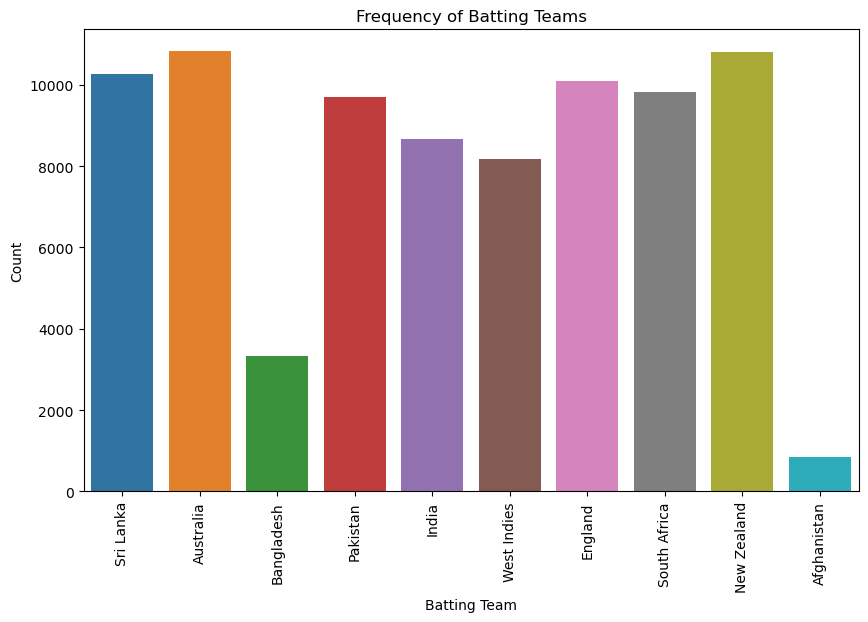

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='batting_team')
plt.xlabel('Batting Team')
plt.ylabel('Count')
plt.title('Frequency of Batting Teams')
plt.xticks(rotation=90)
plt.show()


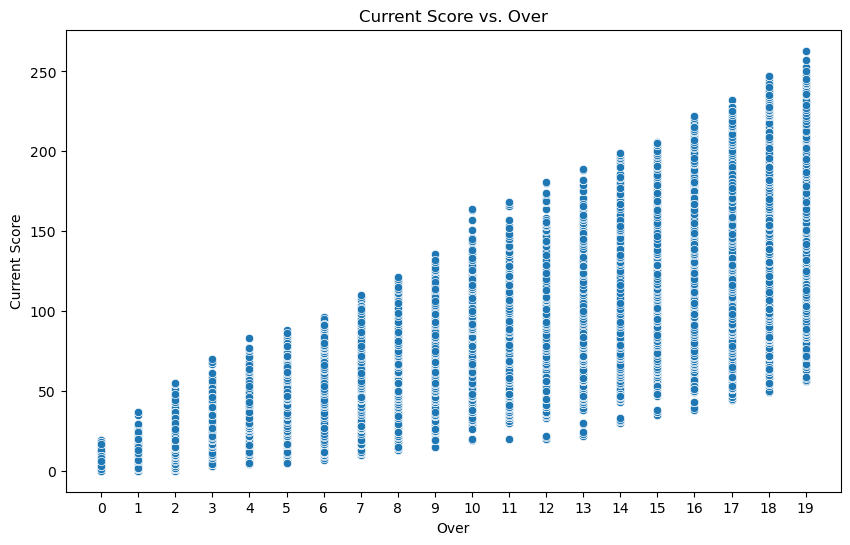

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='over', y='current_score')
plt.xlabel('Over')
plt.ylabel('Current Score')
plt.title('Current Score vs. Over')
plt.show()


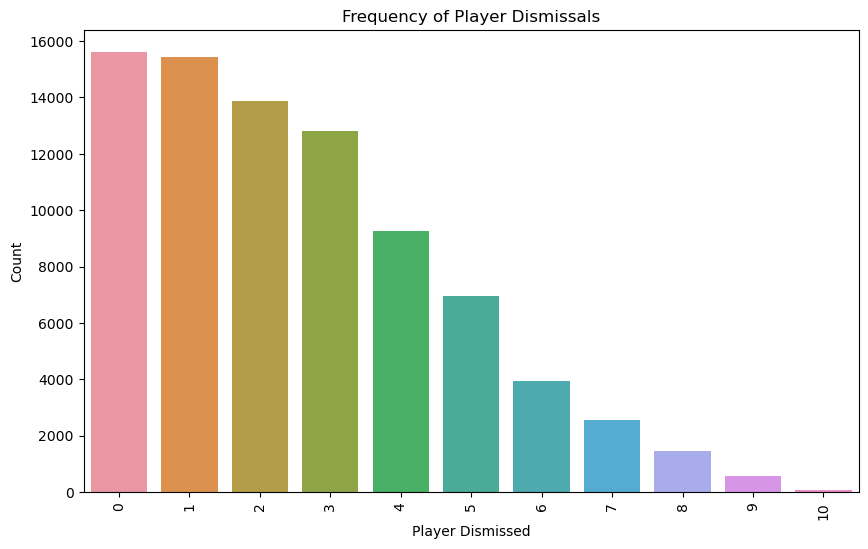

In [129]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='player_dismissed')
plt.xlabel('Player Dismissed')
plt.ylabel('Count')
plt.title('Frequency of Player Dismissals')
plt.xticks(rotation=90)
plt.show()


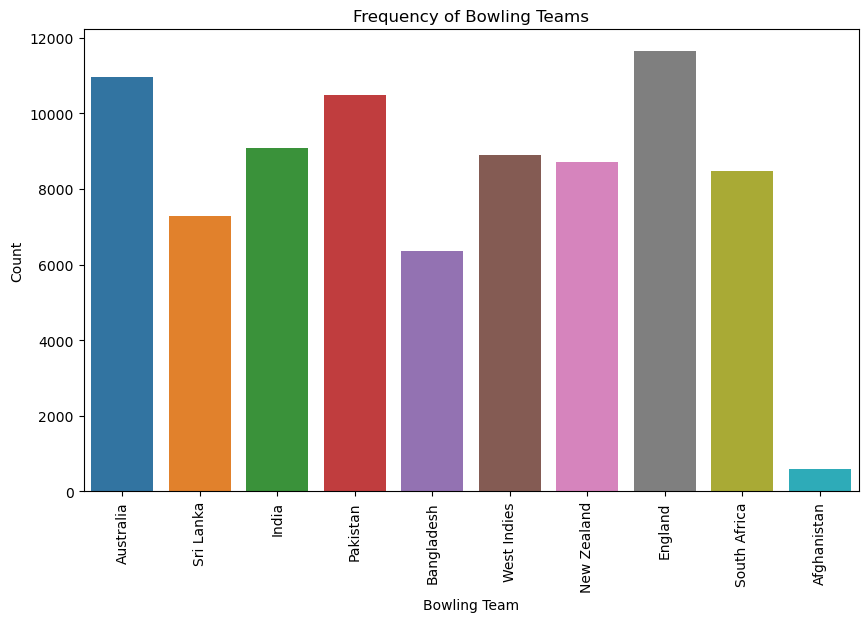

In [130]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bowling_team')
plt.xlabel('Bowling Team')
plt.ylabel('Count')
plt.title('Frequency of Bowling Teams')
plt.xticks(rotation=90)
plt.show()
